<a href="https://colab.research.google.com/github/Valentina3147/ValentinaLopez/blob/main/clases/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dfdata = pd.read_csv("mhealth_raw_data.csv")

In [4]:
dfdata.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [5]:
dfdata.tail()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
1215740,1.7849,-9.8287,0.29725,-0.34137,-0.90056,-0.61493,-3.7198,-8.9071,0.29423,0.041176,-0.99384,-0.48060,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.34137,-0.90056,-0.61493,-3.7160,-8.7455,0.44814,0.041176,-0.99384,-0.48060,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.34137,-0.90056,-0.61493,-3.8824,-9.1155,0.45048,0.041176,-0.99384,-0.48060,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.34137,-0.90056,-0.61493,-3.5564,-9.1441,0.59488,0.041176,-0.99384,-0.48060,0,subject10
1215744,1.6614,-9.8398,0.18088,-0.33210,-0.90432,-0.61886,-3.9035,-8.9324,0.76171,0.035294,-1.02050,-0.47198,0,subject10


In [6]:
dfdata.count()

,0
alx,1215745
aly,1215745
alz,1215745
glx,1215745
gly,1215745
glz,1215745
arx,1215745
ary,1215745
arz,1215745
grx,1215745


In [7]:
dfdata.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [8]:
dfdata.isnull().sum()

,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,0
arx,0
ary,0
arz,0
grx,0


In [9]:
dfdata.Activity.unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

In [10]:
labels = ['Standing still','Sitting and relaxing','Lying down','Walking'
         ,'Climbing stairs','Waist bends forward','Frontal elevation of arms','Knees bending'
          ,'Cycling','Jogging','Running','Jump front & back']

labels

['Standing still',
 'Sitting and relaxing',
 'Lying down',
 'Walking',
 'Climbing stairs',
 'Waist bends forward',
 'Frontal elevation of arms',
 'Knees bending',
 'Cycling',
 'Jogging',
 'Running',
 'Jump front & back']

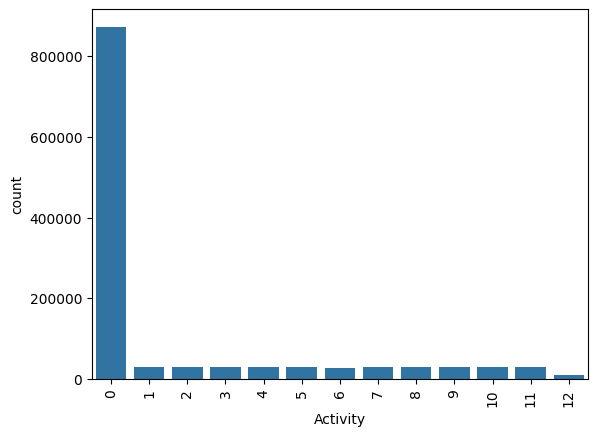

In [11]:
sns.countplot(x='Activity',data=dfdata)
plt.xticks(x=dfdata['Activity'],rotation='vertical')
plt.show()

In [12]:


dfdata[dfdata['Activity']==12].count() #esta contando todos los registros que corresponden a la actividad 12

,0
alx,10342
aly,10342
alz,10342
glx,10342
gly,10342
glz,10342
arx,10342
ary,10342
arz,10342
grx,10342


In [13]:
#vamos a quitar la actividad 0 por que no esta haciendo nada y lo balanceamos para que el 12 tambien quede igual a los demas

from sklearn.utils import resample
dfdata2 = pd.DataFrame()
for i in range(12):
  df_aux=dfdata[dfdata.Activity==i+1]
  df_aux=resample(df_aux,n_samples=10342,random_state=12)
  dfdata2=pd.concat([dfdata2,df_aux])

dfdata2.Activity.value_counts()

,count
Activity,
1,10342
2,10342
3,10342
4,10342
5,10342
6,10342
7,10342
8,10342
9,10342


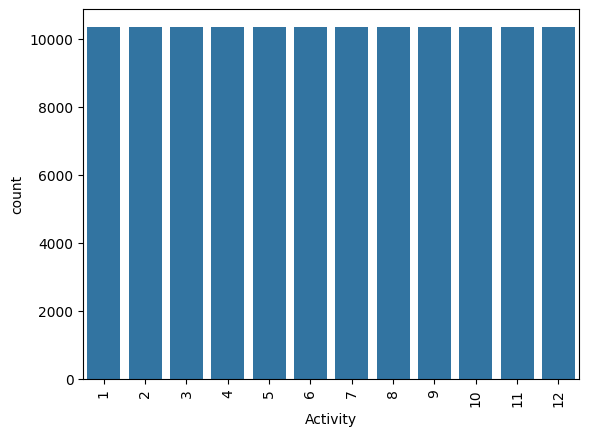

In [14]:
sns.countplot(x='Activity',data=dfdata2)
plt.xticks(x=dfdata['Activity'],rotation='vertical')
plt.show()

In [15]:
dfdata2['Activity'] = dfdata2['Activity']-1 #este es para que arranque en 0

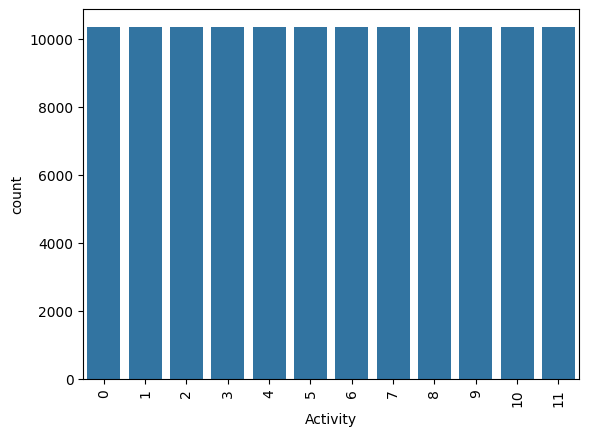

In [16]:
sns.countplot(x='Activity',data=dfdata2)
plt.xticks(x=dfdata['Activity'],rotation='vertical')
plt.show()

In [17]:
dfdata2.head(3)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
535628,2.04060,-9.6081,0.57125,0.73469,-0.65103,-0.11984,-2.2210,-9.6973,0.26513,0.425490,-1.01850,0.41810,0,subject5
207771,0.52666,-9.7816,1.04740,0.64750,-0.69231,0.19253,-3.2801,-8.8206,1.94440,0.052941,-0.78439,0.90948,0,subject2
995975,0.69173,-9.8498,1.16030,-0.54545,-0.77111,0.36149,-2.7749,-9.2509,0.91246,-0.813730,-0.69199,-0.16595,0,subject9


In [18]:
X= dfdata2.drop(['subject','Activity'],axis=1)
y= dfdata2['Activity']

x =np.asarray(X)
y =np.asarray(y)

print(x.shape)
print(y.shape)

(124104, 12)
(124104,)


In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(99283, 12) (99283,) (24821, 12) (24821,)


In [20]:
ytrain

array([ 2, 10,  8, ...,  0,  1, 11])

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(ytrain).reshape(-1,1))

y_train = enc.transform(np.asarray(ytrain).reshape(-1,1)).toarray()
y_test = enc.transform(np.asarray(ytest).reshape(-1,1)).toarray()

In [22]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(256,input_shape=(xtrain.shape[1],),activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(12,activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,316 (509.05 KB)

 Trainable params: 130,316 (509.05 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history = model.fit(xtrain,y_train,epochs=10,batch_size=32,verbose=1,validation_split=0.1)

Epoch 1/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.5361 - loss: 1.2348 - val_accuracy: 0.8393 - val_loss: 0.4535
Epoch 2/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8386 - loss: 0.4688 - val_accuracy: 0.8986 - val_loss: 0.2830
Epoch 3/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8805 - loss: 0.3530 - val_accuracy: 0.9197 - val_loss: 0.2281
Epoch 4/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9017 - loss: 0.2979 - val_accuracy: 0.9209 - val_loss: 0.2304
Epoch 5/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9127 - loss: 0.2603 - val_accuracy: 0.9297 - val_loss: 0.1907
Epoch 6/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9187 - loss: 0.2395 - val_accuracy: 0.9433 - val_loss: 0.1625
Epoch 7/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9281 - loss: 0.2229 - val_accuracy: 0.9449 - val_loss: 0.1573
Epoch 8/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9337 - loss: 0.2046

In [26]:
model.save('NN.h5')

In [27]:
from tensorflow.keras.models import load_model
model = load_model('NN.h5')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,318 (509.06 KB)

 Trainable params: 130,316 (509.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

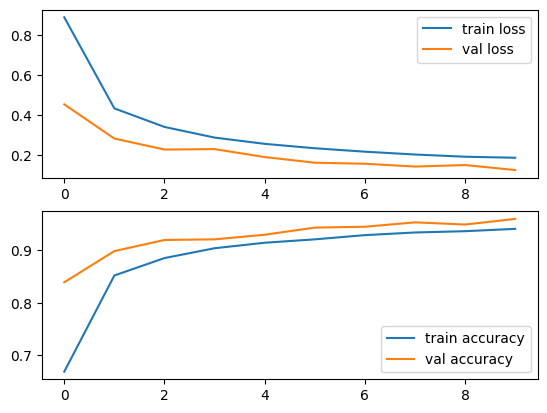

In [28]:
plt.subplot (2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val loss'])


plt.subplot (2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','val accuracy'])


In [33]:
print(xtest.shape)
print(ytest.shape)
print(ypred.shape)

(24821, 12)
(24821,)
(24821, 12)


776/776 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[ 0  9 11 ...  7  4 10]
              precision    recall  f1-score   support

           0     0.9834    0.9995    0.9914      2080
           1     0.9995    1.0000    0.9998      2114
           2     1.0000    1.0000    1.0000      2049
           3     0.9601    0.9646    0.9623      2118
           4     0.9686    0.8956    0.9307      2069
           5     0.9611    0.9733    0.9671      2132
           6     0.9585    0.9864    0.9722      2058
           7     0.9517    0.9594    0.9555      2116
           8     0.9976    0.9942    0.9959      2052
           9     0.8778    0.9069    0.8921      2019
          10     0.9079    0.8911    0.8994      2002
          11     0.9168    0.9095    0.9132      2012

    accuracy                         0.9572     24821
   macro avg     0.9569    0.9567    0.9566     24821
weighted avg     0.9573    0.9572    0.9571     24821



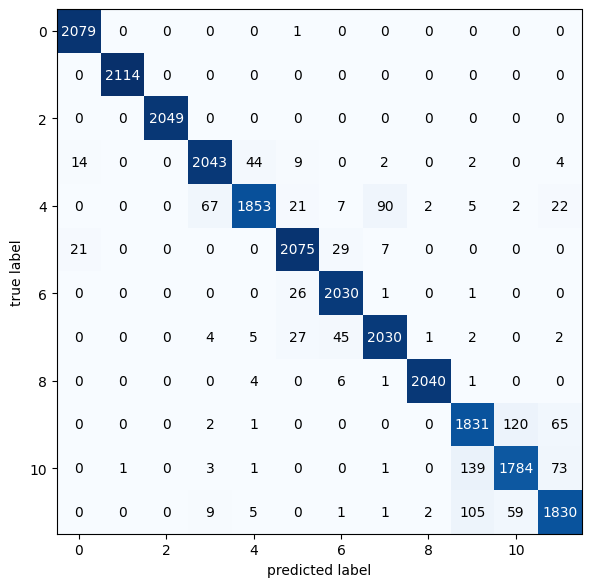

In [34]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

ypred = model.predict(xtest)
print(ytest)
matriz = confusion_matrix(ytest, np.argmax(ypred,axis=1))

plot_confusion_matrix(conf_mat=matriz,figsize=(6,6),show_normed=False)
plt.tight_layout()

print(metrics.classification_report(ytest,np.argmax(ypred,axis=1),digits=4))